# 相关性分析

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("./data/data.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
corr = train.corr()['SalePrice']

In [5]:
corr[corr>0.5].sort_values()

YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [6]:
corr[corr<0].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

## 了解美国房子的关注点
在美国对房子比较关注的几个点，主要包括三各个方面：
- 一个房屋本身的相关物理特性相关特征（eg’OverallQual’）
- 房屋面积相关的特征（eg. ‘TotalBsmtSF’）
- 房屋位置相关变量（eg. 'Neighborhood'）

## 1 OverallQual与SalePrice相关性分析

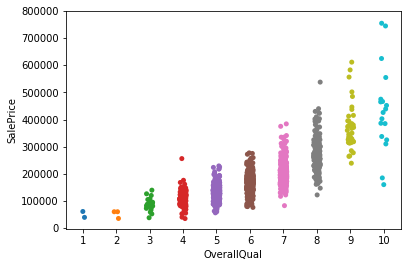

In [7]:
sns.stripplot("OverallQual", "SalePrice", data=train)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


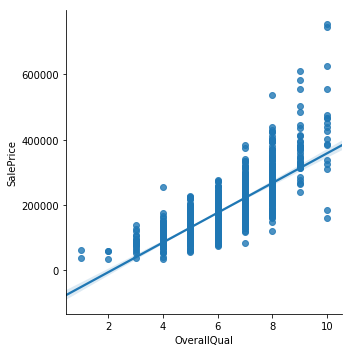

In [8]:
sns.lmplot("OverallQual", "SalePrice", data=train)

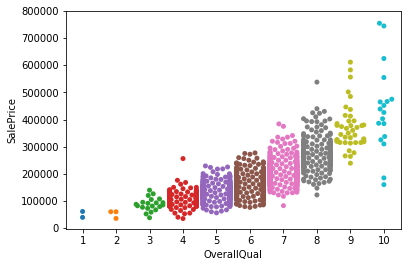

In [9]:
sns.swarmplot("OverallQual", "SalePrice", data=train)

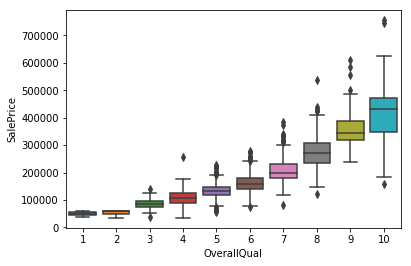

In [10]:
sns.boxplot("OverallQual", "SalePrice", data=train)

OverallQual与SalePrice总体呈正相关

## 2 GrLivArea与SalePrice相关性分析

In [15]:
train[['GrLivArea', 'SalePrice']].sort_values('GrLivArea')

,GrLivArea,SalePrice
533,334,39300
1100,438,60000
916,480,35311
29,520,68500
528,605,86000
696,616,89000
489,630,86000
434,630,81000
1449,630,92000
614,630,75500


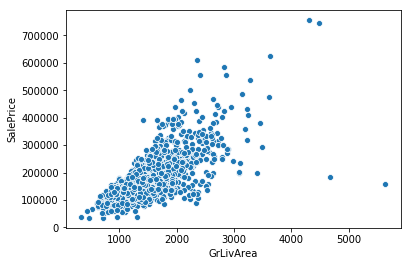

In [18]:
sns.scatterplot("GrLivArea", "SalePrice", data=train)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


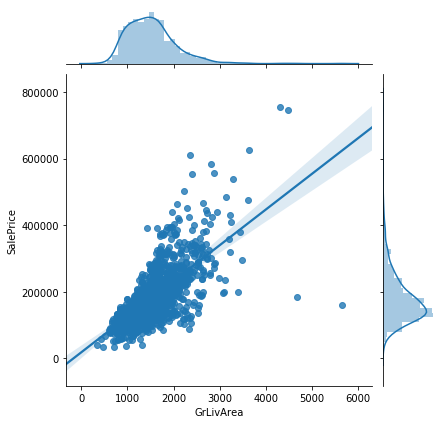

In [17]:
sns.jointplot('GrLivArea','SalePrice',data=train,kind='reg')

## 3 GarageCars与SalePrice相关性分析

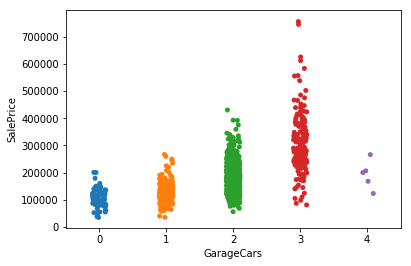

In [19]:
sns.stripplot("GarageCars", "SalePrice", data=train)

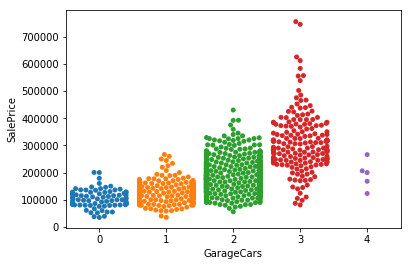

In [20]:
sns.swarmplot("GarageCars", "SalePrice", data=train)

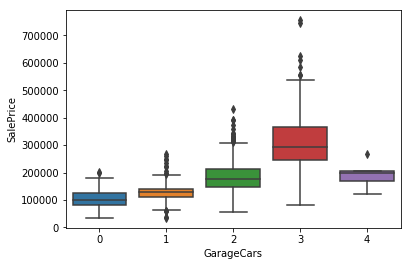

In [21]:
sns.boxplot(x="GarageCars", y="SalePrice", data=train)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


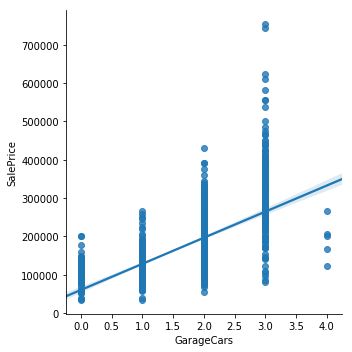

In [22]:
sns.lmplot("GarageCars", "SalePrice", data=train)

## 4 GarageArea与SalePrice相关性分析

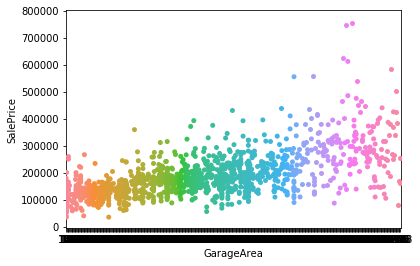

In [23]:
sns.stripplot("GarageArea", "SalePrice", data=train)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


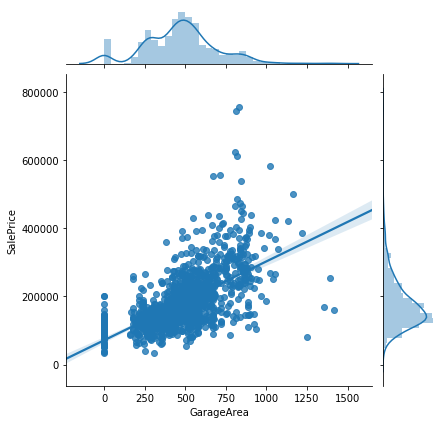

In [24]:
sns.jointplot("GarageArea", "SalePrice", data=train, kind="reg")

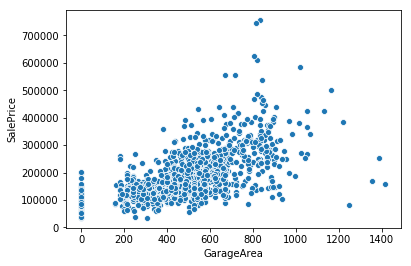

In [25]:
sns.scatterplot("GarageArea", "SalePrice", data=train)

## 5 TotalBsmtSF与SalePrice相关性分析

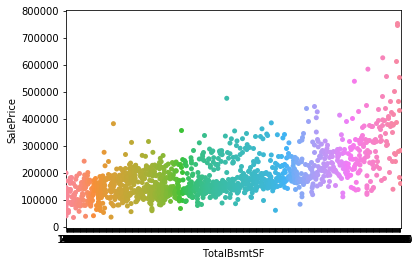

In [27]:
sns.stripplot("TotalBsmtSF", "SalePrice", data=train)

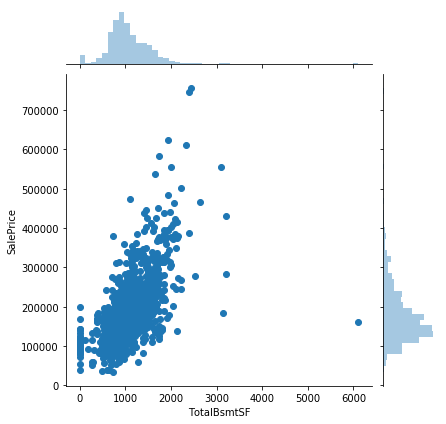

In [31]:
sns.jointplot("TotalBsmtSF", "SalePrice", data=train)

## 6 1stFlrSF与SalePrice相关性分析

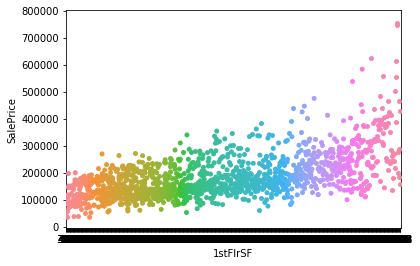

In [29]:
sns.stripplot("1stFlrSF", "SalePrice", data=train)

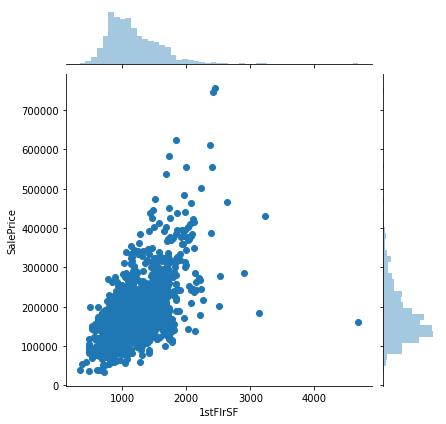

In [32]:
sns.jointplot("1stFlrSF", "SalePrice", data=train)

## 7 FullBath与SalePrice相关性分析

## 8 TotRmsAbvGrd与SalePrice相关性分析

## 9 YearBuilt与SalePrice相关性分析m

## 10 YearRemodAdd与SalePrice相关性分析